In [1]:
import numpy as np
from scipy.stats import norm
from numpy.linalg import matrix_rank, eig

N = 100
x1 = norm.rvs(size=N)
x2 = norm.rvs(size=N)
x3 = norm.rvs(size=N)
x4 = x1 + x2
x5 = x2 + x3
X = np.c_[x1, x2, x3, x4, x5] #組合所有的向量
#print(X)
Sx = np.cov(X.T) 
rank = matrix_rank(Sx)
w, v = eig(Sx)
print(w.sum()) #eigenvalue
print(np.diag(Sx).sum()) #共變異數矩陣的對角線相加

5.721172523351383
5.721172523351382


[[-6.22784450e-01  2.16824860e+00  1.18016196e+00 -1.54255575e+00
   2.23273976e+00 -1.05130572e+00 -1.62953403e+00  1.56545413e+00
   6.90132046e-01  1.92079769e+00 -3.72178719e-01 -2.96688572e+00
   2.65077268e+00 -7.80873171e-01 -1.10896382e+00  1.55925324e+00
   1.40062335e+00 -9.33843533e-01 -1.76577845e+00 -1.58992687e+00
  -6.50178856e-01 -3.40999979e+00 -4.44044978e-01 -2.59663273e+00
  -9.41839569e-01 -1.22965101e-01  6.53973011e-01  2.50995294e+00
   3.10262779e-01  2.69079759e+00 -6.86457959e-01 -1.99719530e+00
   5.07065412e+00 -1.36616629e+00  2.74072537e-01  2.34753475e+00
  -7.29888664e-01  2.45278203e-01  6.68248771e-01 -3.34982209e+00
   2.70147965e+00 -5.83857152e-01 -4.71745329e-01 -1.33198714e+00
  -1.87688016e+00 -2.30943316e+00 -3.59984602e-01 -2.04158758e+00
   5.26839050e-01  2.51584771e-01 -3.57126775e+00 -6.19028688e-01
   4.11466901e-02  1.87757656e+00 -1.42749763e+00  2.60818408e+00
   5.77394766e+00 -2.36751005e-01  2.04129220e+00  3.16092499e-01
  -1.28277

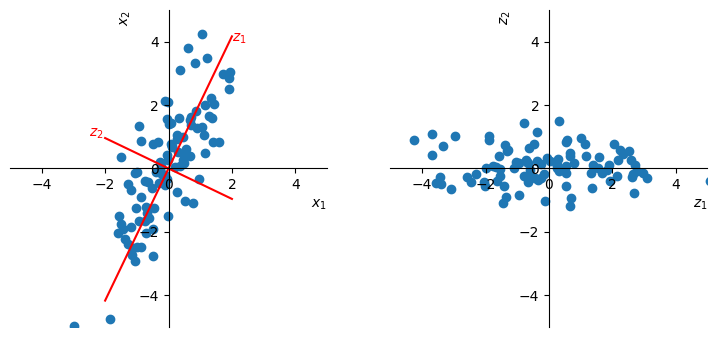

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from numpy.linalg import matrix_rank, eig
N = 100
x1 = norm.rvs(size=N)
x2 = 1.5 * x1 + norm.rvs(size=N)
fig, ax = plt.subplots(1, 2, figsize = (9, 5))
ax[0].scatter(x1, x2)
ax[0].set_xlabel("$x_1$", loc = "right")
ax[0].set_ylabel("$x_2$", loc = "top")
ax[0].spines["left"].set_position(("data", 0))
ax[0].spines["bottom"].set_position(("data", 0))
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

# -------------------------------------------------------
X = np.c_[x1, x2] #(100,2)
#print(X)
Sx = np.cov(X.T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
# -------------------------------------------------------
x = np.array([-2, 2])
y1 = eigvecs[1, 0]/ eigvecs[0, 0] * x
ax[0].plot(x, y1, color = "red")
y2 = eigvecs[1, 1]/ eigvecs[0, 1] * x
ax[0].plot(x, y2, color = "red")
ax[0].set_aspect(1)
ax[0].set_xlim([-5, 5])
ax[0].set_ylim([-5, 5])
ax[0].text(2, 4, "$z_1$", color = "red")
ax[0].text(-2.5, 1, "$z_2$", color = "red")

Z = eigvecs.T @ X.T 
#print(Z)
ax[1].scatter(Z[0, :], Z[1, :])
ax[1].set_aspect(1)
ax[1].set_xlim([-5, 5])
ax[1].set_ylim([-5, 5])

ax[1].set_xlabel("$z_1$", loc = "right")
ax[1].set_ylabel("$z_2$", loc = "top")
ax[1].spines["left"].set_position(("data", 0))
ax[1].spines["bottom"].set_position(("data", 0))
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
print(Z)
